User: Belayet, Age: 23, Email: abc@gmail.com
Added $5000 to your account. Current Balance: $5000
Expense recorded: $1000 on Food. Remaining Balance: $4000
Expense recorded: $500 on Rent. Remaining Balance: $3500
Expense recorded: $500 on WiFi. Remaining Balance: $3000
Expense recorded: $500 on Utility Bill. Remaining Balance: $2500
Expense recorded: $500 on Transport. Remaining Balance: $2000
Transactions saved successfully!


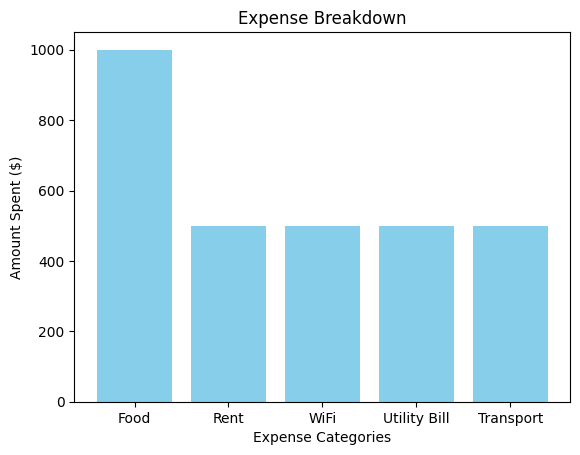

In [ ]:
import json
import re
import matplotlib.pyplot as plt
from datetime import datetime

class User:
    def __init__(self, name, age, email):
        if not re.match(r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$", email):
            raise ValueError("Invalid email format")
        self.name = name
        self.age = age
        self.email = email
        self.account_balance = 0
        self.transactions = []

    def user_info(self):
        return f"User: {self.name}, Age: {self.age}, Email: {self.email}"

class Income(User):
    def add_income(self, amount):
        if amount <= 0:
            raise ValueError("Income amount must be positive")
        self.account_balance += amount
        self.transactions.append({"Type": "Income", "Amount": amount, "Date": datetime.now().strftime("%Y-%m-%d")})
        print(f"Added ${amount} to your account. Current Balance: ${self.account_balance}")

class Expense(Income):
    def add_expense(self, category, amount):
        if amount > self.account_balance:
            print("Insufficient funds!")
            return
        self.account_balance -= amount
        self.transactions.append({"Type": "Expense", "Category": category, "Amount": amount, "Date": datetime.now().strftime("%Y-%m-%d")})
        print(f"Expense recorded: ${amount} on {category}. Remaining Balance: ${self.account_balance}")

class FixedExpense(Expense):
    def add_fixed_expense(self, rent, wifi):
        self.add_expense("Rent", rent)
        self.add_expense("WiFi", wifi)

class VariableExpense(FixedExpense):
    def add_variable_expense(self, utility, transport):
        self.add_expense("Utility Bill", utility)
        self.add_expense("Transport", transport)

    def save_transactions(self):
        with open("transactions.json", "w") as file:
            json.dump(self.transactions, file, indent=4)
        print("Transactions saved successfully!")
    def display_expense_chart(self):

            expenses = [t for t in self.transactions if t["Type"] == "Expense"]


            if len(expenses) == 0:
                print("No expenses to display.")
                return


            category_totals = {}
            for expense in expenses:
                category = expense["Category"]
                amount = expense["Amount"]
                if category in category_totals:
                    category_totals[category] += amount
                else:
                    category_totals[category] = amount


            plt.bar(category_totals.keys(), category_totals.values(), color='skyblue')
            plt.xlabel("Expense Categories")
            plt.ylabel("Amount Spent ($)")
            plt.title("Expense Breakdown")
            plt.show()
# user
try:
    user = VariableExpense("Belayet", 23, "abc@gmail.com")
    print(user.user_info())
    user.add_income(5000)
    user.add_expense("Food", 1000)
    user.add_fixed_expense(500, 500)
    user.add_variable_expense(500, 500)
    user.save_transactions()
    user.display_expense_chart()
except ValueError as e:
    print("Error:", e)
